In [11]:
import time

In [12]:
def extended_euclidean_algorithm(a, b):
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = b, a

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t


def inverse_of(n, p):
    gcd, x, y = extended_euclidean_algorithm(n, p)
    assert (n * x + p * y) % p == gcd

    if gcd != 1:
        # Или n равно 0, или p не является простым.
        raise ValueError(
            '{} has no multiplicative inverse '
            'modulo {}'.format(n, p))
    else:
        return x % p

In [13]:
def IsPrime(n):
    if n in [1,2,3,5,7,11,13,17]: return True
    
    import math, random
    
    # проверка на делимость в пределах 257 делителей
    for i in range(2, min(2000, int(math.sqrt(n)) + 1) ):
        if n % i == 0:
            return False
    
    # тест Миллера — Рабина
    k = max(math.ceil(math.log(n, 2)), 10)
    
    s = 0
    d = n - 1
    
    while d % 2 == 0:
        s += 1
        d //= 2
    
    for _ in range(k):
        a_k = random.randint(2, n - 2)
        x = pow(a_k, d, n)
        
        if x == 1 or x == n - 1: # проверка на первое условие
            continue
        
        flag = False
        for _ in range(s - 1): # проверка на второе условие
            x = pow(x, 2, n)
            if x == 1:
                return False
            if x == n - 1:
                flag = True
                break
        
        if flag:
            continue
            
        return False
    return True

In [14]:
class Point:
    
    def __init__(self, a, b, mod, x = 0, y = 0):
        self.a = a
        self.b = b
        self.mod = mod
        self.x = x % mod
        self.y = y % mod
    
    def __neg__(self):
        return Point(self.a, self.b, self.mod, self.x, (-self.y) % self.mod)
    
    def __add__(self, p):
        if self.x == self.y == 0: 
            return Point(self.a, self.b, self.mod, p.x, p.y)
        elif p.x == p.y == 0: 
            return Point(self.a, self.b, self.mod, self.x, self.y)
        elif self.x == p.x and self.y == (-p.y) % self.mod:
            return Point(self.a, self.b, self.mod)
        elif self.x != p.x:
            sign = -1 if self.x - p.x < 0 else 1
            m = ((self.y - p.y) * sign * inverse_of(abs(self.x - p.x), self.mod)) % self.mod
            rx = (m**2 - self.x - p.x) % self.mod
            ry = (self.y + m * (rx - self.x)) % self.mod
        else:
            sign = -1 if self.y < 0 else 1
            m = ((3 * self.x * self.x + self.a) * sign * inverse_of(2 * abs(self.y), self.mod)) % self.mod
            rx = (m**2 - self.x - p.x) % self.mod
            ry = (self.y + m * (rx - self.x)) % self.mod
            
        return Point(self.a, self.b, self.mod, rx, -ry)
    
    def __mul__(self, n):
        a = Point(self.a, self.b, self.mod, self.x, self.y)
        res = Point(self.a, self.b, self.mod)
        
        while n:
            if n & 1:
                res = res + a
                n -= 1
            else:
                a = a + a
                n >>= 1
                
        return res;
    
    def __str__(self):
        return f"<{self.x}, {self.y}>"

In [15]:
def ECPoints(a, b, p, x0, y0):
    p1 = Point(a, b, p, x0, y0)

    i = 1
    temp = p1
    result = [(p1.x, p1.y)]
    
    while True:
        temp += p1
        result.append((temp.x, temp.y))
        if temp.x == temp.y == 0: 
            break
        i+=1
        
    return result

In [16]:
def ECFindOrderTime(a, b, p, x0, y0):
    p1 = Point(a, b, p, x0, y0)

    i = 1
    temp = p1
    result = [(p1.x, p1.y)]
    
    start = time.time()
    while not(temp.x == temp.y == 0):
        temp += p1
        i+=1
    end = time.time()
        
    return (end - start) / 60, i

**Для p = 4759:**

In [26]:
m = 97

In [27]:
ECFindOrderTime(2, 3, m, 3, 6)

(7.033348083496094e-07, 5)

In [28]:
ECPoints(2, 3, m, 3, 6)

[(3, 6), (80, 10), (80, 87), (3, 91), (0, 0)]

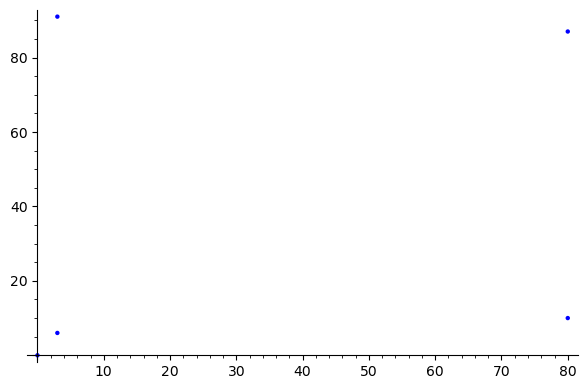

In [29]:
list_plot(ECPoints(2, 3, m, 3, 6)).show()

In [20]:
lst = []

for m in range(999, 5000, 2):
    if IsPrime(m):
        lst.append((m, ECFindOrderTime(-7, 10, m, *(5, 10))[0]))

list_plot(lst).show()

KeyboardInterrupt: 

In [ ]:
m = 80000527
m, ECFindOrderTime(-7, 10, m, *(5, 10)) # (80000527, (13.11787569920222, 80013441))

**Удовлетворение теореме Хассе:**

In [ ]:
import math
80013441 <= 2 * math.sqrt(80000527) + (80000527 + 1)